<a href="https://colab.research.google.com/github/soda1102/AI_26/blob/main/05_01_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MBC 마켓에서 신상품으로 캔 와인을 판매하려고 한다.
# 주류는 온라인 판매가 안되서 온라인 예약 후 오프라인 매장에서 구매 유도예정.

# 입고된 와인을 보니 레드와인인지 화이트와인인지 구분이 어렵다.
# 캔에 인쇄된 알콜도수, 당도, ph값으로 와인 종류 구별.

# 품질확인용으로 뜯은 캔이 테스트용으로 있고 이것을 데이터로 활용
# 로지스틱 회귀 모델로 적용을 해서 알아보자.

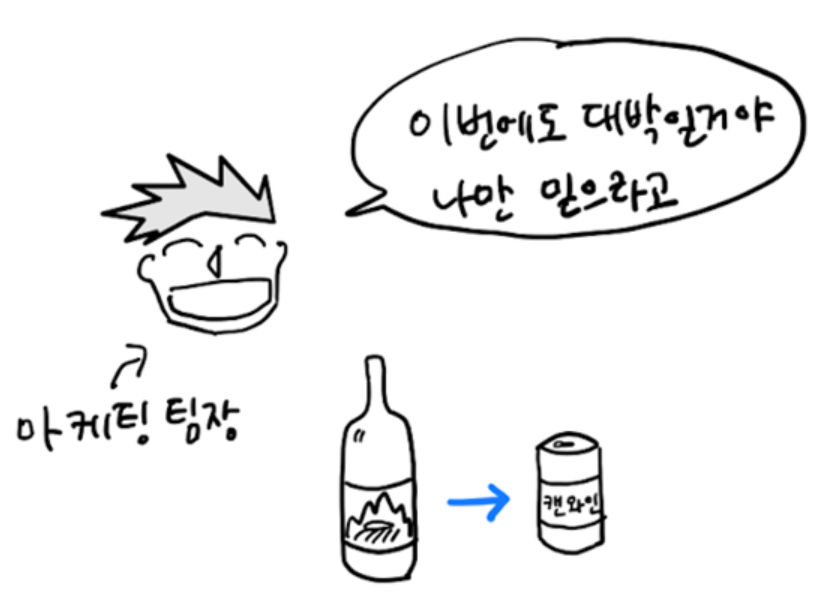

In [1]:
# 와인의 특성화된 데이터를 넣자
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

# 알콜, 당도, 산소, 클래스(타깃 = 0(레드와인), 1(화이트와인))
# 데이터에서 화이트와인이 양성클래스로 화이트와인을 표시하는 문제

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()
# 결과 6497개의 샘플 4개의 열(실수형)
# Non-Null 누락된 값이 없다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()  # 열에 대한 통계
# mean = 평균, std = 표준편차, min = 최소
# 25% = 1/4(1 사분위), 50% = 중간값(2/4), 75% = 3/4, max = (100%, 4/4)
# 사분위수 : 데이터를 순서대로 4등분한 값

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
# StandardScaler 클래스로 특성을 표준화 해야한다.
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()  # 넘파이 배열로 변환
# 와인 데이터 프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data 배열에 저장

target = wine['class'].to_numpy()
# class 열을 넘파이 배열로 바꿔서 target(정답) 배열에 저장

# 훈련 입력 값
print(data)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]


In [6]:
# 훈련 정답
print(target)

[0. 0. 0. ... 1. 1. 1.]


In [7]:
# 훈련세트와 테스트세트로 나눈다.

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42)

# train_test_split() 함수는 설정값을 지정하지 않으면 25%를 테스트 세트로 지정
# test_size = 0.2를 이용해서 20% 정도만 테스트 세트로 지정
print(train_input.shape, test_input.shape)  # 6496 * 0.8 = 5196.8

(5197, 3) (1300, 3)


In [8]:
from sklearn.preprocessing import StandardScaler
# 훈련세트 전처리(표준점수로 변환 : 단위를 맞추는 효과)

ss = StandardScaler()
ss.fit(train_input)  # 훈련시작

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled)
print('---------------------')
print(test_scaled)

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 ...
 [-0.82568214  0.0267578   0.14437512]
 [-0.82568214  0.52716215 -0.23153545]
 [-0.82568214 -0.57789745  1.83597265]]
---------------------
[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 ...
 [ 1.60871671 -0.76554908 -0.16888369]
 [-0.90962693  0.88161523  0.52028568]
 [-1.49724045  2.09092573 -1.98578474]]


In [9]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 훈련
lr = LogisticRegression()
lr.fit(train_scaled, train_target)  # 훈련시작

print(lr.score(train_scaled, train_target))  # 78.08%
print(lr.score(test_scaled, test_target))  # 77.76%

# 결론 : 80점 이하로 점수가 낮게나온다.(과소적합)

0.7808350971714451
0.7776923076923077


In [10]:
# 제출용 보고서를 만들어보자

# 로지스틱 회귀(계수 = 가중치, 절편 = 더해지는 값)
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [ ]:
# 알콜 도수값이 0.51268071를 곱하고,
# 당도에 1.67335441을 곱하고
# pH 값에 -0.68775646을 곱한 다음 모두 더하기
# 위에 나온 값이 절편 1.81773456을 더한다.
# 이 값이 0보다 크면 화이트와인, 작으면 레드와인
# 현재 77% 정도 정확히 화이트 와인으로 분류완료

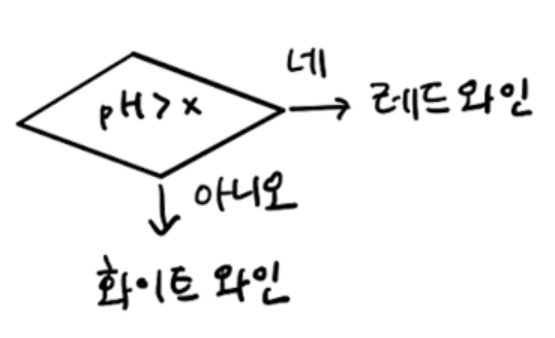

In [11]:
# 결정트리(이유를 설명하기 쉽다.)
# if문을 사용하는 것과 유사

# Decision : 결정_디시전
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 결정 트리 모델로 훈련
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)  # 훈련시작

print(dt.score(train_scaled, train_target))  # 훈련세트
print(dt.score(test_scaled, test_target))  # 테스트세트
# 과대 적합(훈련점수 99.69%, 테스트점수 85.92%)

0.996921300750433
0.8592307692307692


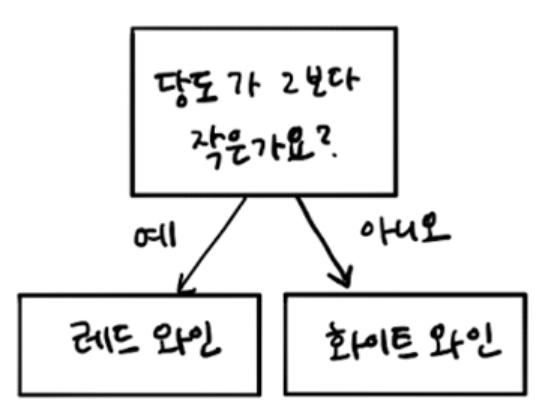

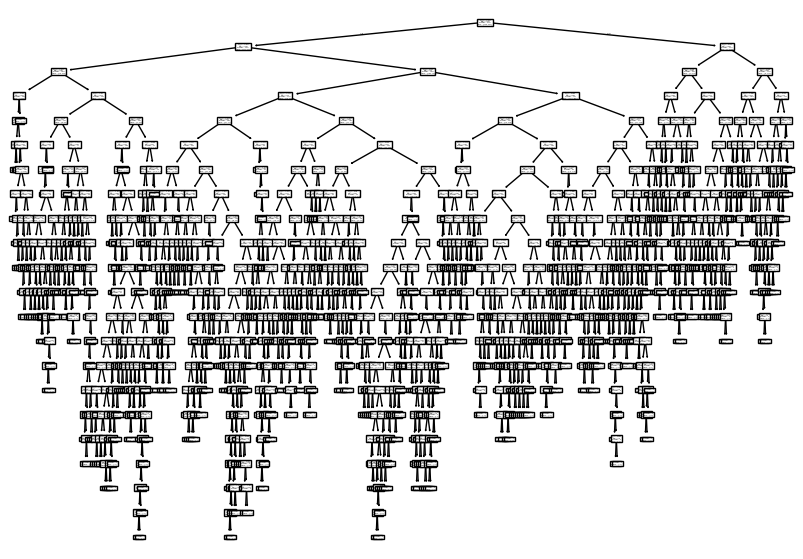

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# figure : 형태, 도형
plt.figure(figsize=(10, 7))
# figsize=(10, 7) 그래프의 사이즈(가로인치, 세로인치)

plot_tree(dt)
plt.show()
# 맨위 노드(루트노드), 맨아래노드(리프노드)

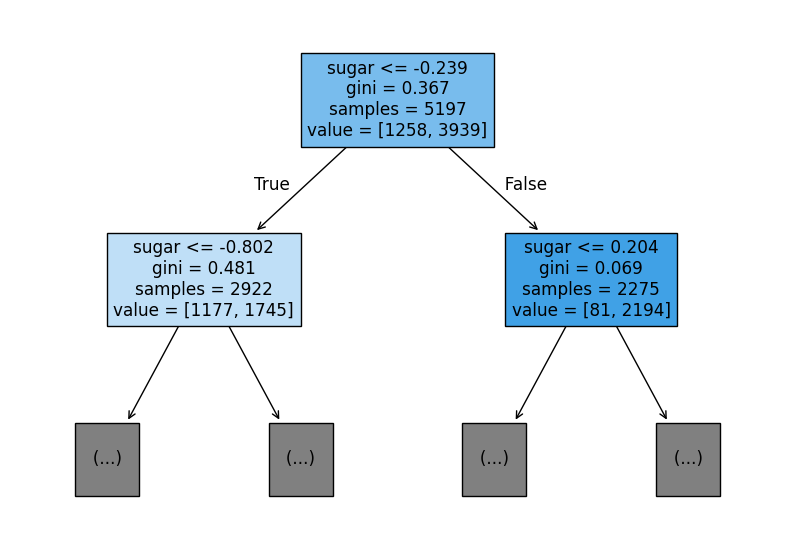

In [13]:
plt.figure(figsize=(10, 7))
plot_tree(dt, max_depth = 1, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
# max_depth = 1 루트노드를 제외
# filled = True 클래스에 맞게 색칠
# feature_names = ['alcohol', 'sugar', 'pH']
plt.show()

# sugar가 -0.239보다 이상이면 false
# sugar가 -0.239보다 같거나 작으면 true (왼쪽 가지로)
# 총샘플 수 : 5,197개
# 음성클래스(레드와인) : 1,258개
# 양성클래스(화이트와인) : 3,939개
    # 아래쪽 노드에 왼쪽 노드를 살펴보자
    # 이 노드는 당도가 더 낮은지를 물어보는 노드 (-0.802)
    # 당도가 -0.802와 같거나 낮다면 다시 왼쪽으로
    # 그렇지 않으면 오른쪽으로 이동, 음성클래스 : 1,177개, 양성클래스 : 1,745개

    # 오른쪽 노드를 보면 음성클래스가 81개, 양성클래스 2,194개로
    # 대부분이 화이트 와인 샘플이 이 노드로 이동된다.

# gini = 0.367 (불순도)
# sample = 5197 (총샘플수)
# value = 값 (1258(1), 3939(0))

In [14]:
# 노드의 바탕색을 유심히 보면 루트노드보다 더 진하고, 왼쪽 노드는 연해진다.
# filled=True로 지정하면 클래스 마다 색깔을 지정함, 비율이 높아지면 점점 진하게 표시한다.

# 결정트리에서 예측하는 방법은 간단한데, 리프노드에서 가장 많은 클래스가 예측 클래스가 된다.
# 만약 이결정 트리로 성장을 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한
# 샘플은 모두 양성 클래스로 예측된다. (양성 클래스가 많아서)

# gini 불순도로 노드에서 데이터를 분할할 기준을 정하는 값

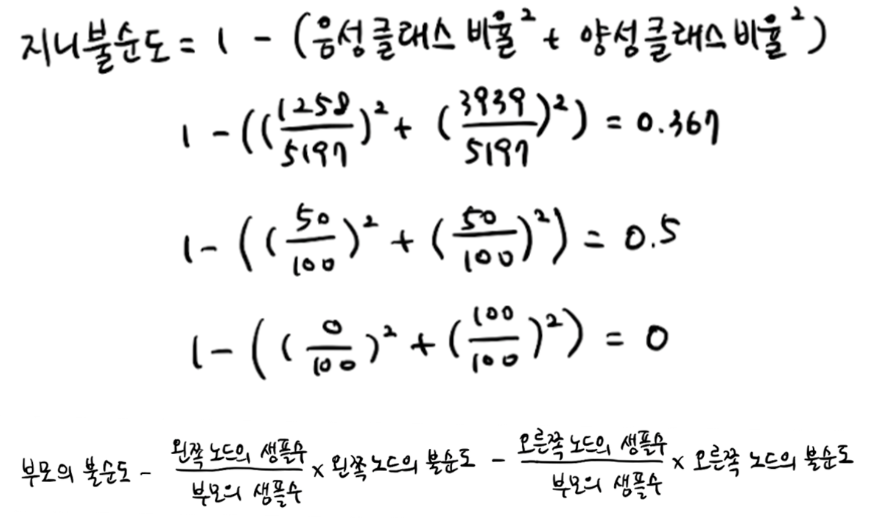

In [15]:
# 가지치기 : 열매를 잘 맺기 위해서 가지치기를 하듯이 결정트리에서도 사용한다.
# 가지치기를 하지 않으면 무장정 끝까지 자라나는 트리를 만듬
# 트리의 깊이(depth)를 지정하면 된다.

# 새로운 객체를 깊이 3으로 만든다.
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
# 트리의 깊이 : max_depth = 3

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))  # 84.54%
print(dt.score(test_scaled, test_target))  # 84.15%

0.8454877814123533
0.8415384615384616


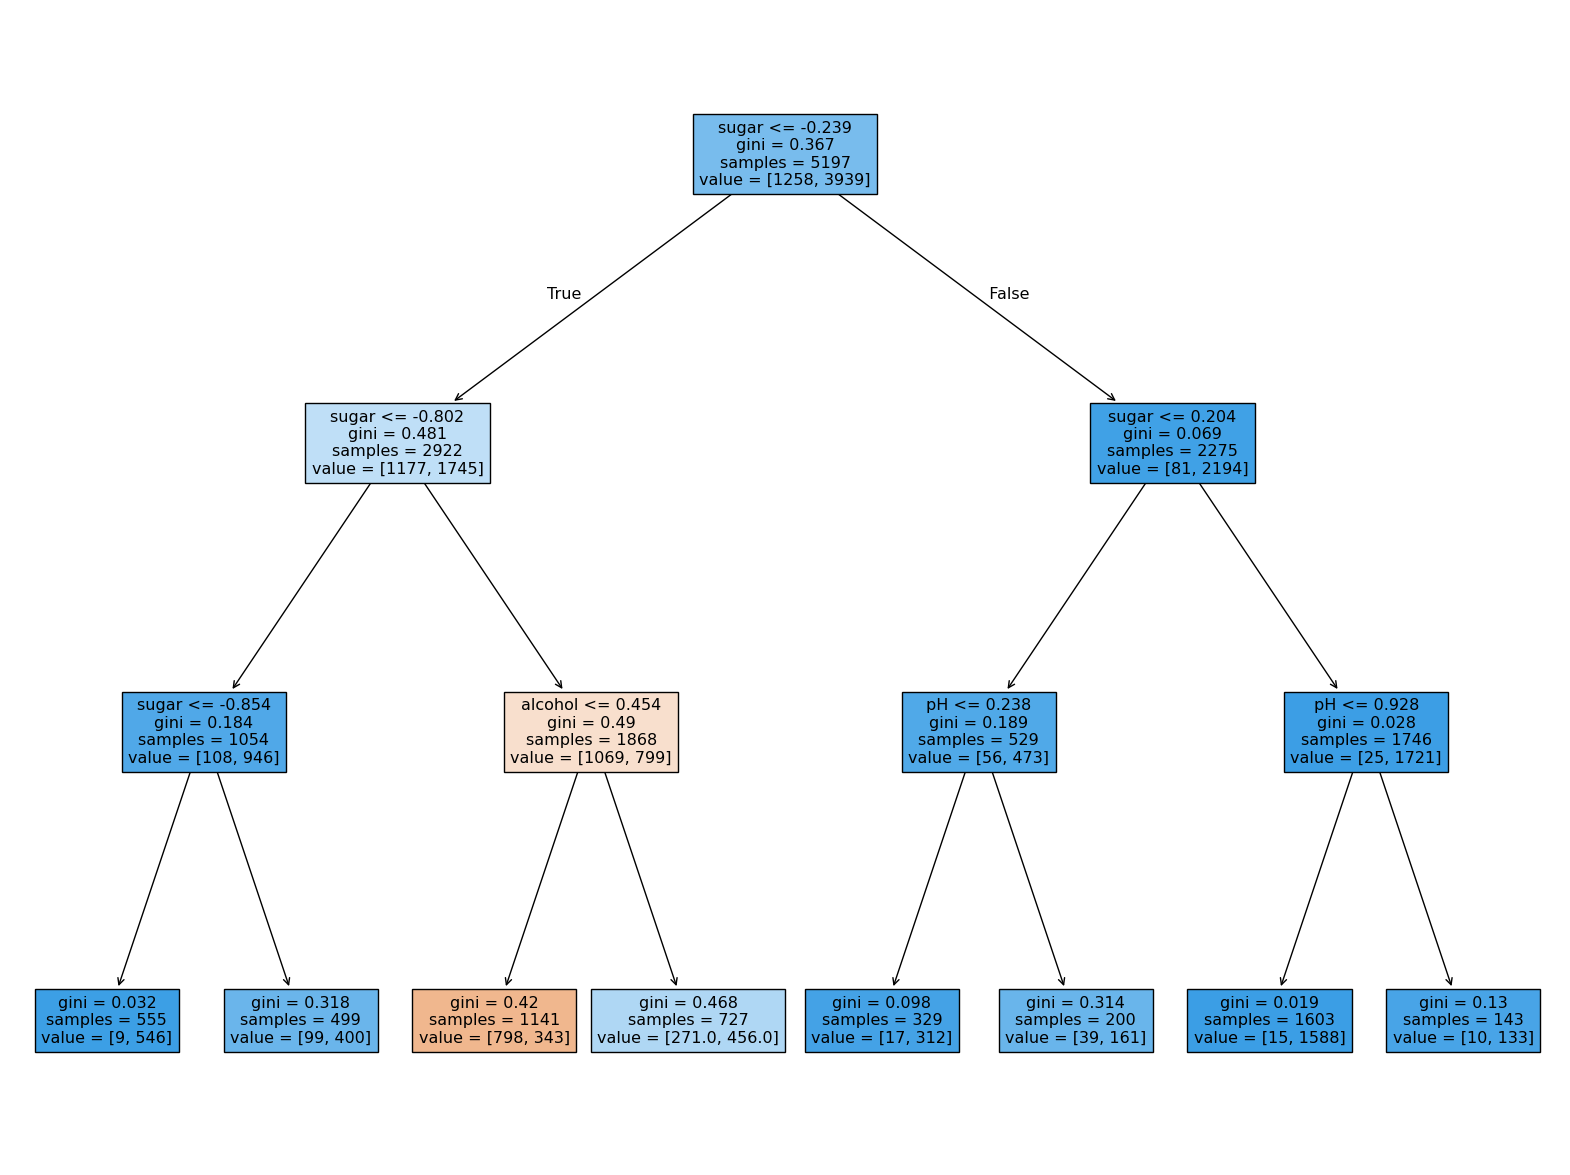

In [17]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [18]:
# 그래프 분석
# 루트노드(depth=0) 다음 깊에 있는 depth=1 노드는 모두 당도를 기준으로 훈련세트를 나눔
# 하지만 depth=2에서는 맨 왼쪽 노드만 당도를 기준으로 나누고 외쪽에서 두번째 노드는 알콜
# 도수를 기준으로 나눔 오른쪽 두 노드는 pH를 사용합니다.

# 깊이 3에 있는 노드가 최종 노드인 리프 노드이다.
# 왼쪽에서 세번째에 있는 노드만 음성 클래스가 더 많다.
# 이 노드에 도착해야만 레드와인으로 예측한다.
# 결론 : 당도는 -0.239보다 작고 -0.802보다 커야한다.
#        알콜 도수는 0.454보다 작으면 레드 와인이다.

# -0.802라는 음수로된 당도를 상사에게 보고 할수 있나??
# 표준화(표준점수) 전처리를 하지 않고 결정 트리를 사용해보자.(특성값에 스케일은 효과가 없다.)

dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))  # 84.52%
print(dt.score(test_input, test_target))  # 84.15% → 표준화 점수 사용 안함.

0.8454877814123533
0.8415384615384616


In [19]:
import numpy as np

sample = np.array([9.5, 1.6, 3.17])
sample = sample.reshape(1, -1)

dt.predict(sample)
# 타깃 = 0(레드와인) / 1(화이트와인)

array([1.])

In [21]:
pred = dt.predict([[9.5, 1.6, 3.17]])

if pred[0] == 0:
  print("Red Wine")

else:
  print("White Wine")

White Wine


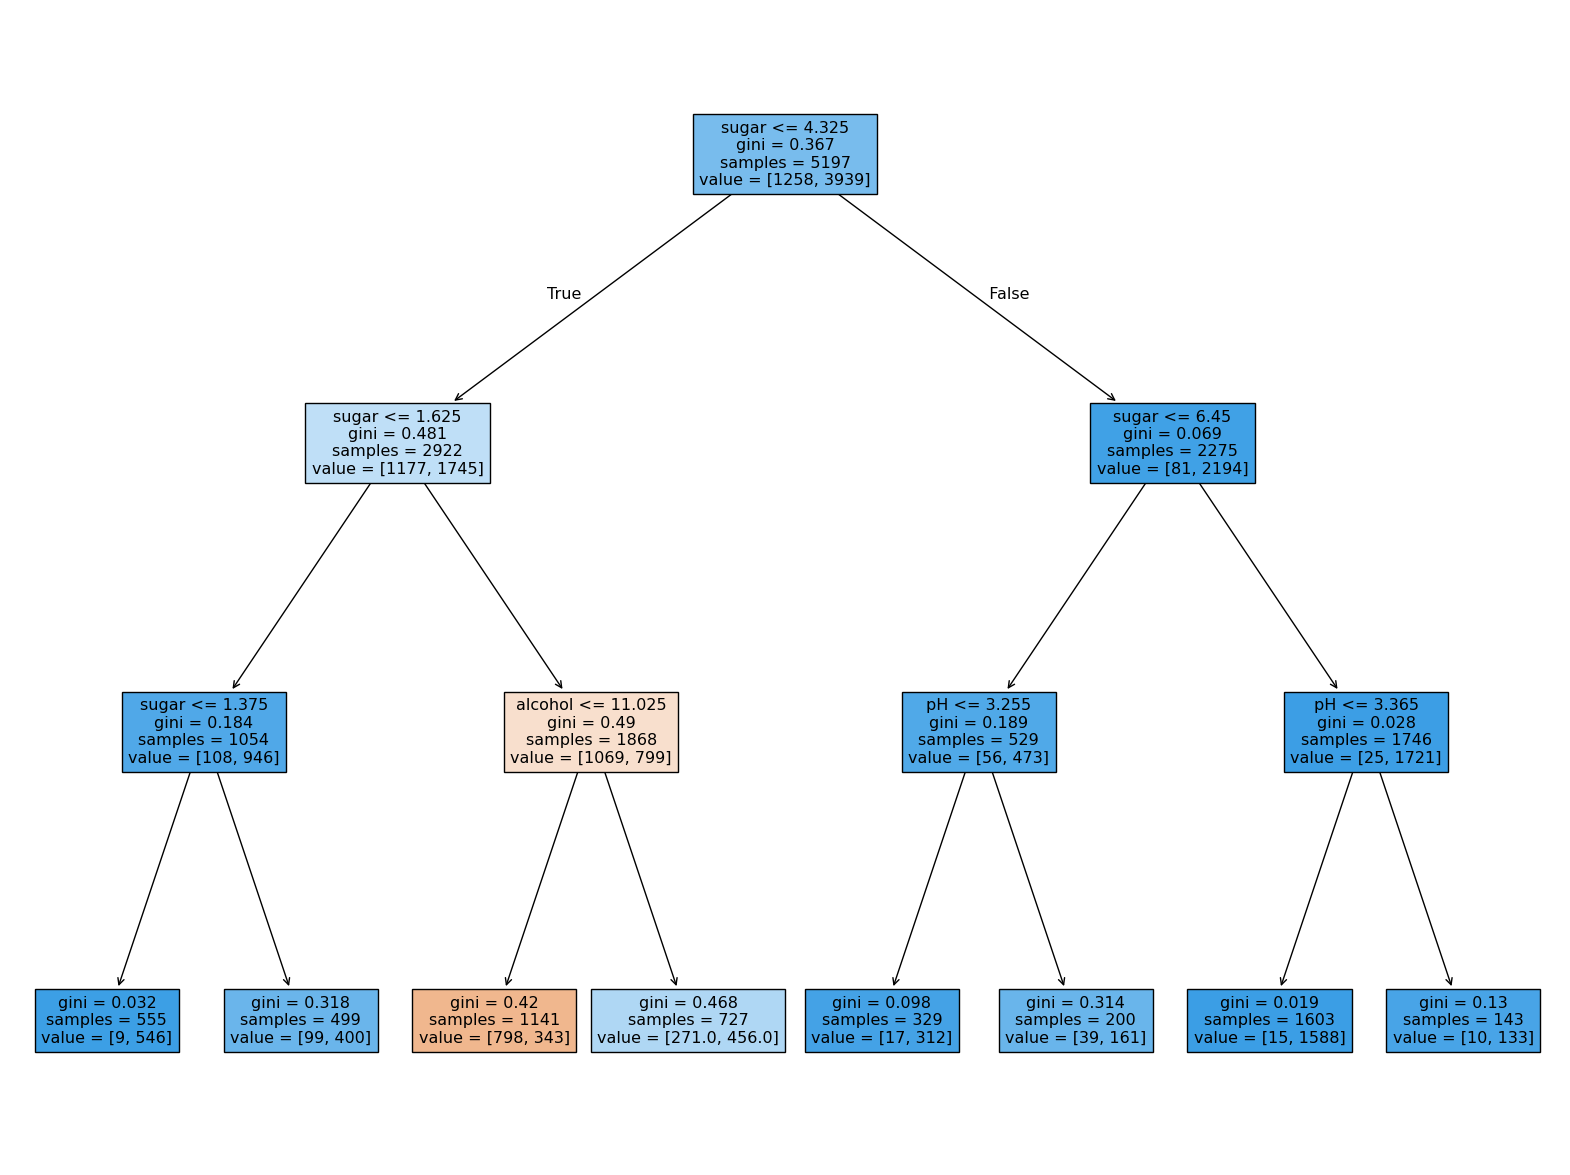

In [22]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 결과 보고서에 넣을 내용
# 당도가 1.625보다 크고 4.325보다 작은 와인 중에
# 알콜 도수가 11.025와 같거나 작은것이 레드와인 으로 판단됨.
# 위 트리에서 주황색 부분이 레드와인으로 판단되고 나머지는 화이트와인이다.!!!

In [23]:
# 결정트리는 어떤 특성이 가장 유용했는지 나타내는 특성 중요도를 계산해준다.
print(dt.feature_importances_)
# 알콜도수    당도       ph     -> 순서는 입력값 (다 더하면 1이 나와야한다.)

[0.12345626 0.86862934 0.0079144 ]


In [24]:
# 좌우가 균일하지 않은 트리
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)

# min_impurity_decrease : 최소 불순도
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))  # 88.74%
print(dt.score(test_input, test_target))  # 86.15%

0.8874350586877044
0.8615384615384616


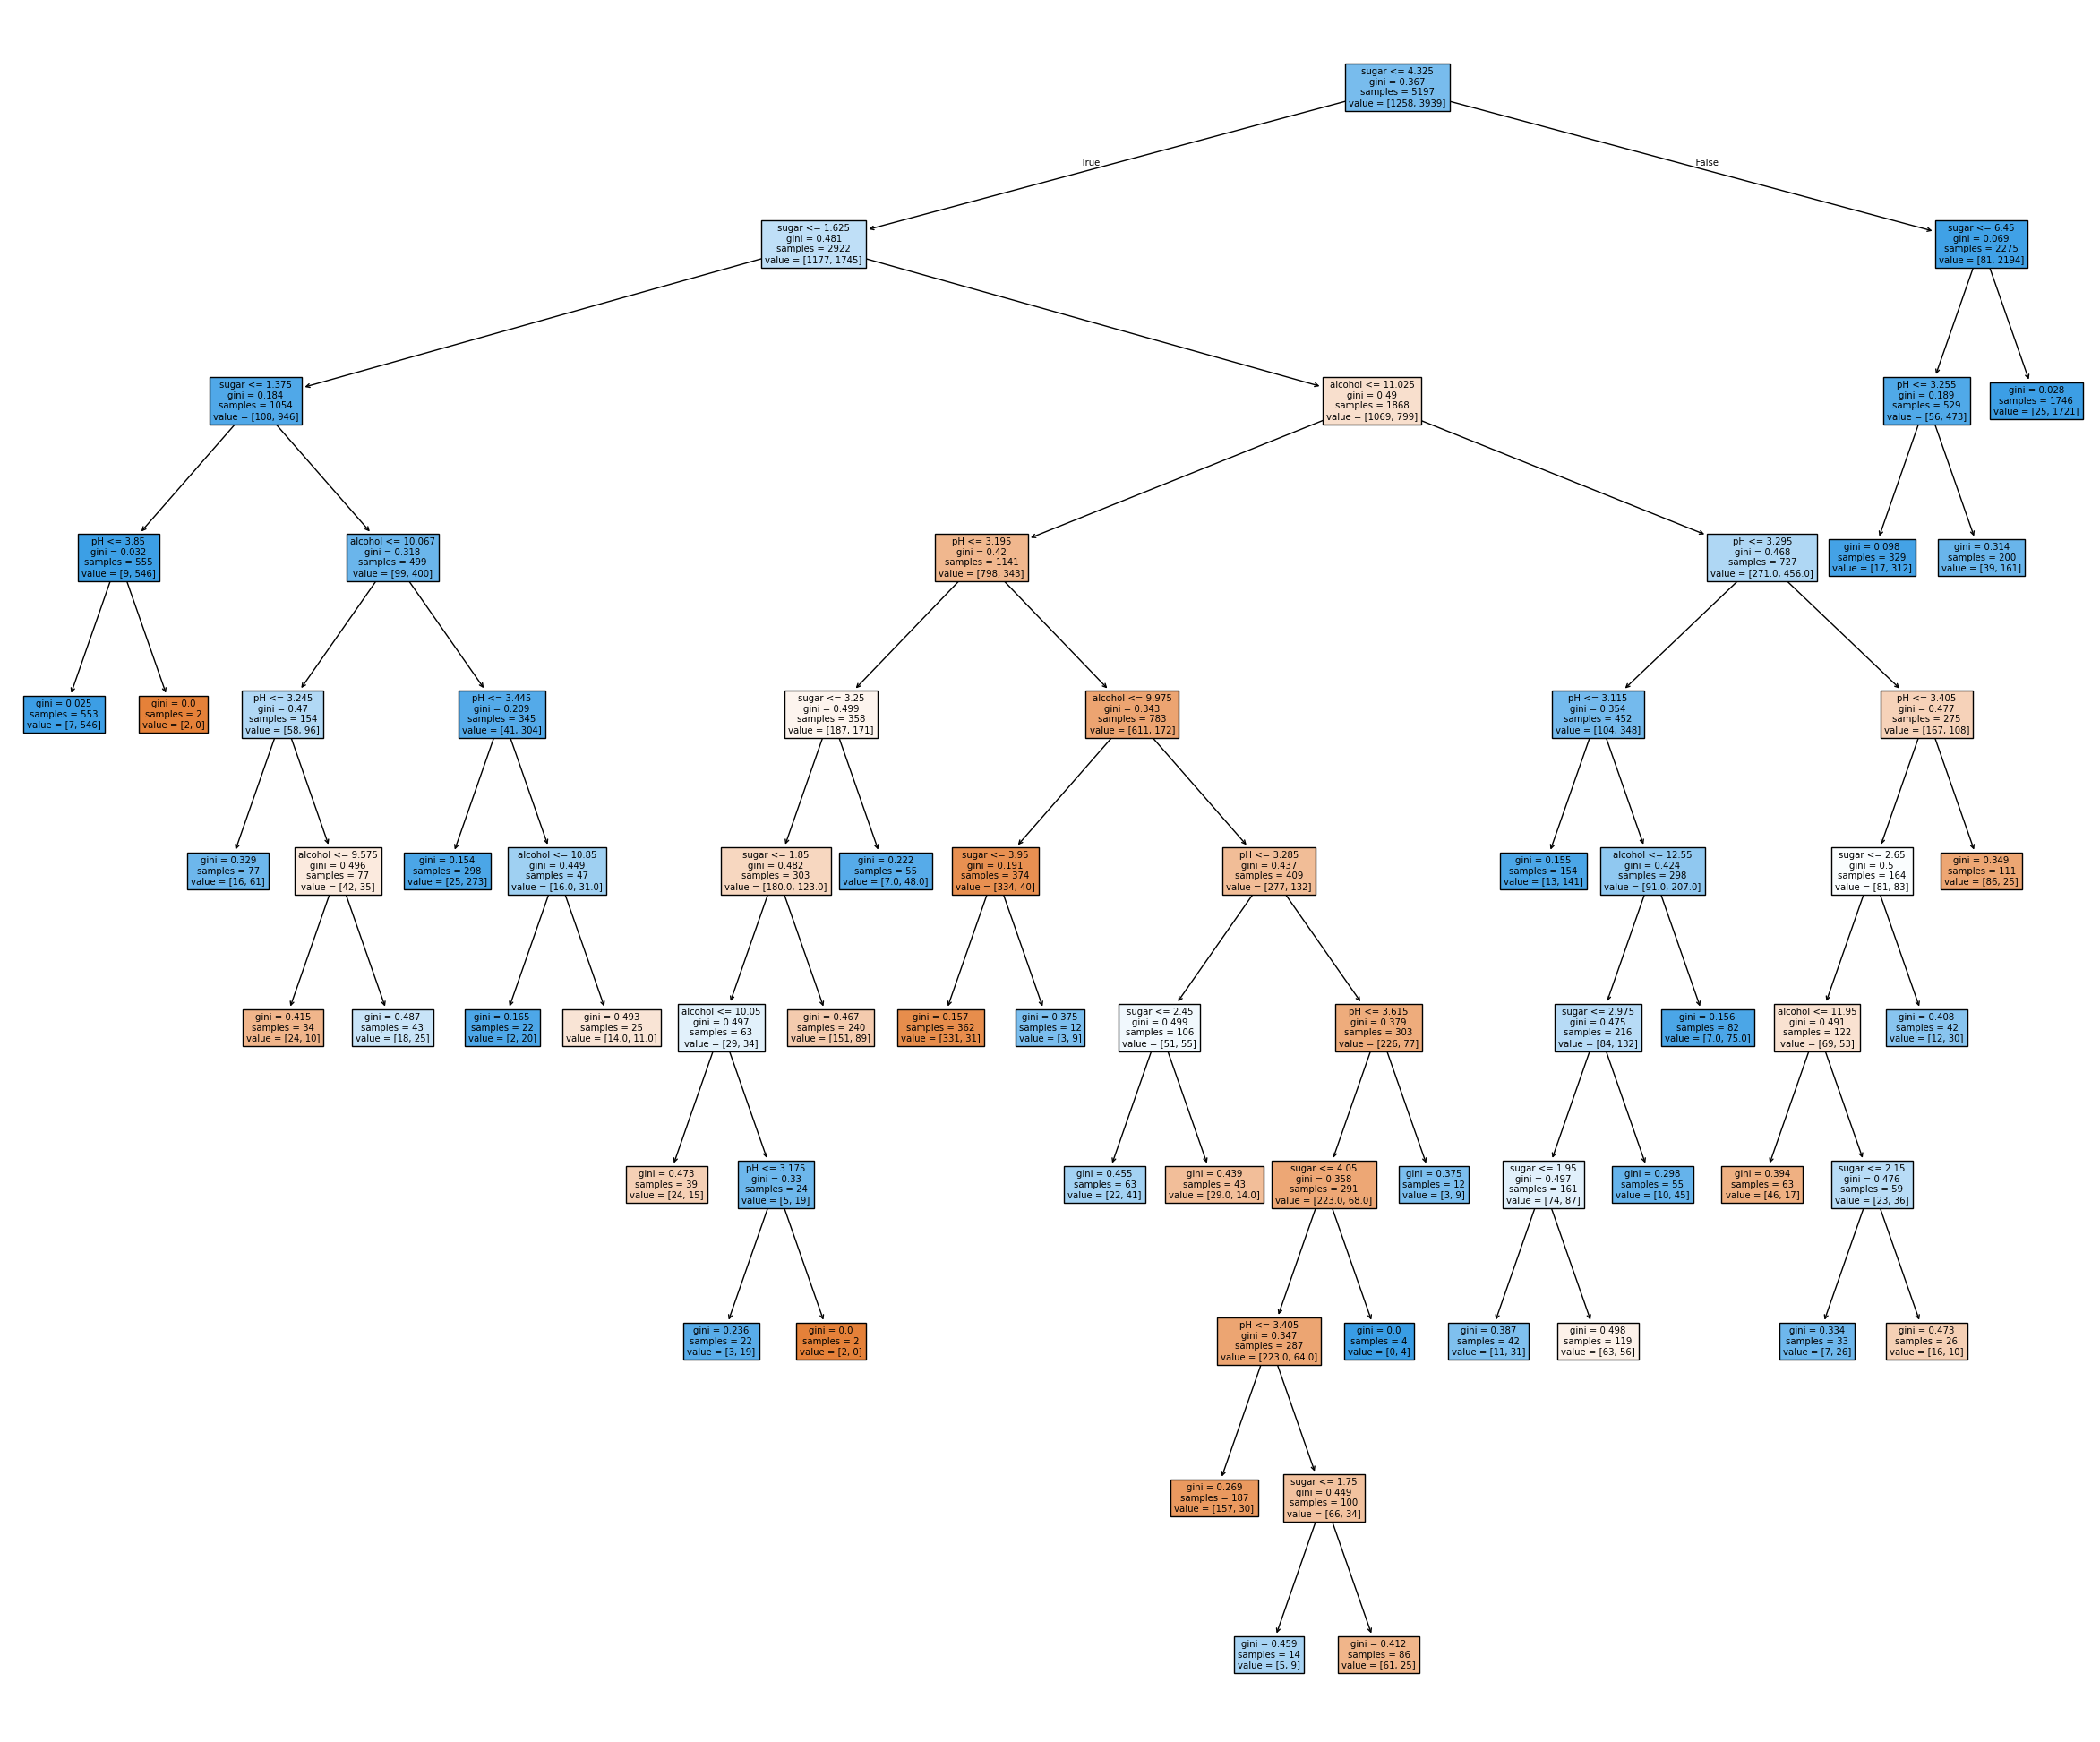

In [25]:
plt.figure(figsize = (30, 25))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()